In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from clustering.fuzzy_c_mean.fuzzy import run_fuzzy_c_means
from clustering.k_mean_plus_mhho.kmean import run_kmean_mhho
from tsp.ahaco.ahaco import run_ahaco

In [2]:
input_path_file = "D:\\Logistic_code\\code\\vrp\\clustering\\fuzzy_c_mean\\data2.csv"

In [3]:
dataframe = pd.read_csv(input_path_file)
data = dataframe.to_numpy()

In [4]:
vehicle_num = 13
vehicle_capacity = 66
depot = np.array([500, 500])

In [5]:
def processing(path: np.ndarray):
    start_index = np.where(path == -1)[0][0]
    return np.roll(path.copy(), -start_index)[1:]

### Fuzzy C Means clustering

In [6]:
fuzzy_cluster_center, fuzzy_distance_data = run_fuzzy_c_means(
        num_cluster=vehicle_num, 
        data=data.copy(), 
        capacity=vehicle_capacity,
        increase_vehicle=False
    )

---------------Starting clustering with 13 vehicles---------------
Finishing clustering with number of vehicles 13


In [7]:
fuzzy_cluster_center

array([[931.34855569, 668.55645995],
       [548.22072382, 195.08766464],
       [754.20409954, 940.9568086 ],
       [881.78405607, 270.67930672],
       [302.00687775, 685.9852207 ],
       [133.97590117, 510.31668819],
       [125.86535342, 888.63461447],
       [296.04024123, 312.00537018],
       [611.73603085, 558.05247859],
       [480.53616934, 716.09864577],
       [806.47727506, 118.15482427],
       [450.53287481, 917.74288156],
       [797.64713161, 673.04411402]])

In [8]:
fuzzy_distance_data

array([[ 740.        ,  442.        ,    8.        ,    8.        ,
         172.97347649],
       [ 261.        ,  710.        ,   10.        ,    4.        ,
          47.52129678],
       [ 578.        ,  522.        ,    8.        ,    8.        ,
          49.37510496],
       [ 482.        ,  914.        ,    5.        ,   11.        ,
          31.68894334],
       [ 628.        ,  644.        ,   10.        ,    8.        ,
          87.47281366],
       [ 551.        ,  651.        ,    5.        ,    9.        ,
          95.93219018],
       [ 828.        ,   54.        ,    9.        ,   10.        ,
          67.66881974],
       [ 541.        ,  270.        ,   10.        ,    1.        ,
          75.25952991],
       [ 450.        , 1000.        ,    6.        ,   11.        ,
          82.25884444],
       [ 521.        ,  127.        ,    5.        ,    1.        ,
          73.32733379],
       [ 738.        ,  809.        ,   10.        ,    2.        ,
         132

### TSP With AHACO

In [9]:
fuzzy_tsp_record = ""
fuzzy_total_cost = 0
fuzzy_best_ant_paths = []
for i in range(len(fuzzy_cluster_center)):
    element = np.where(fuzzy_distance_data[:, 3] == i) ## Get index of all points belong to cluster
    city_index = np.append(element[0], -1)
    space = fuzzy_distance_data[element][:,:2]
    space_with_depot = np.append(space, [depot], axis=0)

    best_ant_path, best_fitness = run_ahaco(space_with_depot)
    best_ant_path_without_depot = processing(city_index[best_ant_path])

    fuzzy_best_ant_paths.append(
            best_ant_path_without_depot
        )
    fuzzy_total_cost = fuzzy_total_cost + best_fitness
    fuzzy_tsp_record = fuzzy_tsp_record + f"Route {i}: " + str(best_ant_path_without_depot).replace(' [', '').replace('[', '').replace(']', '') + "\n"
    pass
fuzzy_tsp_record = fuzzy_tsp_record + f"Total cost : {fuzzy_total_cost:.2f}"

In [ ]:
fuzzy_sol_data_file = "D:\\Logistic_code\\code\\vrp\\clustering\\fuzzy_c_mean\\abc.txt"
with open(fuzzy_sol_data_file, 'w') as f:
    f.write(fuzzy_tsp_record) 

In [10]:
print(fuzzy_tsp_record)

Route 0: 105  41  96  91  19  73
Route 1: 62 71  9 85 46 39 99 61  7
Route 2: 86 25 52 14 65 97 10
Route 3: 22 69 43 80 28 77 15 89
Route 4: 70 79 98  1 55 29
Route 5: 26 64 35 58 94 16 30 27 38
Route 6:  42  92  63 103  59  60  21  82  75
Route 7: 51 49 67 53 95 87 74 20 40 11 57 18
Route 8:  13   2 107  90   4  37   0  48
Route 9:   5  76  83  24  17 108  68
Route 10:  47  72  34  93  36   6 106  81  56  12
Route 11: 102  23   3 100  32   8 101  54
Route 12:  45  88  44  33  66  50  84 104  31  78
Total cost : 16029.78


### K mean clustering with MHHO

In [5]:
kmean_cluster_center, kmean_distance_data = run_kmean_mhho(
        data=data.copy(),
        num_cluster=vehicle_num,
        vehicle_capacity=vehicle_capacity,
    )

Iteration 0
Update fitness at 0
Update fitness at 3
['At iteration 0 the best fitness is 4151922.2996002175']
Iteration 1
['At iteration 1 the best fitness is 4151922.2996002175']
Iteration 2
['At iteration 2 the best fitness is 4151922.2996002175']
Iteration 3
['At iteration 3 the best fitness is 4151922.2996002175']
Iteration 4
Update fitness at 14
['At iteration 4 the best fitness is 4147853.637053399']
Iteration 5
['At iteration 5 the best fitness is 4147853.637053399']
Iteration 6
['At iteration 6 the best fitness is 4147853.637053399']
Iteration 7
Update fitness at 25
['At iteration 7 the best fitness is 3612115.582503814']
Iteration 8
['At iteration 8 the best fitness is 3612115.582503814']
Iteration 9
Update fitness at 10
['At iteration 9 the best fitness is 3608052.3483659364']
Iteration 10
['At iteration 10 the best fitness is 3608052.3483659364']
Iteration 11
Update fitness at 1
['At iteration 11 the best fitness is 3607876.1225352497']
Iteration 12
['At iteration 12 the bes

### TSP With AHACO

In [9]:
kmean_tsp_record = ""
kmean_total_cost = 0
kmean_best_ant_paths = []
for i in range(len(kmean_cluster_center)):
    element = np.where(kmean_distance_data[:, 3] == i) ## Get index of all points belong to cluster
    city_index = np.append(element[0], -1)
    space = kmean_distance_data[element][:,:2]
    space_with_depot = np.append(space, [depot], axis=0)

    best_ant_path, best_fitness = run_ahaco(space_with_depot)
    best_ant_path_without_depot = processing(city_index[best_ant_path])
    kmean_best_ant_paths.append(
            best_ant_path_without_depot
        )
    kmean_total_cost = kmean_total_cost + best_fitness
    kmean_tsp_record = kmean_tsp_record + f"Route {i}: " + str(best_ant_path_without_depot).replace(' [', '').replace('[', '').replace(']', '') + "\n"
    # pass
kmean_tsp_record = kmean_tsp_record + f"Total cost : {kmean_total_cost:.2f}"

In [ ]:
kmean_sol_data_file = "clustering\\fuzzy_c_mean\\kmean_data2.txt"
with open(kmean_sol_data_file, 'w') as f:
    f.write(kmean_tsp_record) 

In [10]:
print(kmean_tsp_record)

Route 0: 94 71 20 74 87 95 53 67
Route 1: 15 28 69 43 80 93 36  6
Route 2:  7 61 99 39 46 85  9 62 57
Route 3:  13   2  90 107 104 105  96 106
Route 4: 91 19 73 77 89 31 78  0
Route 5:   5  68  17  24  55 103  29  79  70  49
Route 6: 32  8  3 86 25 52 14 65 97
Route 7: 51 38 27 30 16 40 11 18 48
Route 8: 21 60 59 92 42 63 35 58 26
Route 9: 72 34 81 56 12 22 47
Route 10: 108 102 100  23  83  76  10  84  50
Route 11:   1  64  98  54  75  82 101
Route 12: 37 33 41 44 66 88 45  4
Total cost : 18825.84


In [29]:
kmean_distance_data[kmean_best_ant_paths[1]]

array([[875.        , 326.        ,   9.        ,   1.        ,
        209.95126712],
       [977.        , 318.        ,  10.        ,   1.        ,
        201.66608092],
       [878.        , 243.        ,   8.        ,   1.        ,
        130.00919126],
       [918.        , 227.        ,   6.        ,   1.        ,
        104.78364402],
       [986.        , 151.        ,  10.        ,   1.        ,
         65.40386979],
       [955.        ,   6.        ,   6.        ,   1.        ,
        119.90653433],
       [922.        ,  16.        ,   7.        ,   1.        ,
        106.7313228 ],
       [828.        ,  54.        ,   9.        ,   1.        ,
        120.51562   ]])

### Plotting

In [12]:
def plot_points(centroid : np.ndarray, distance_data : np.ndarray, best_ant_paths: list, depot:np.ndarray):
    figure(figsize=(14, 12), dpi=80)
    cluster_color = np.random.rand(centroid.shape[0], 3)
    # Plot depot 
    plt.scatter(depot[0], depot[1], marker="X", c=[[0,0,0]])
    # Plot point  
    for i in range(distance_data.shape[0]):
        data = distance_data[i]
        # print(cluster_color[data[3]])
        plt.scatter(data[0], data[1], marker="o", c = [cluster_color[int(data[3])]])
    # Plot cluster center
    # plt.scatter(centroid[:,1], centroid[:,2], marker="x", c=[[0,0,0]])
    # Plot route
    for i in range(len(best_ant_paths)):
        plt.plot(np.concatenate((np.array([depot[0]]), distance_data[best_ant_paths[i]][:,0], np.array([depot[0]])), axis=0),
                np.concatenate((np.array([depot[1]]), distance_data[best_ant_paths[i]][:,1], np.array([depot[1]])), axis=0))

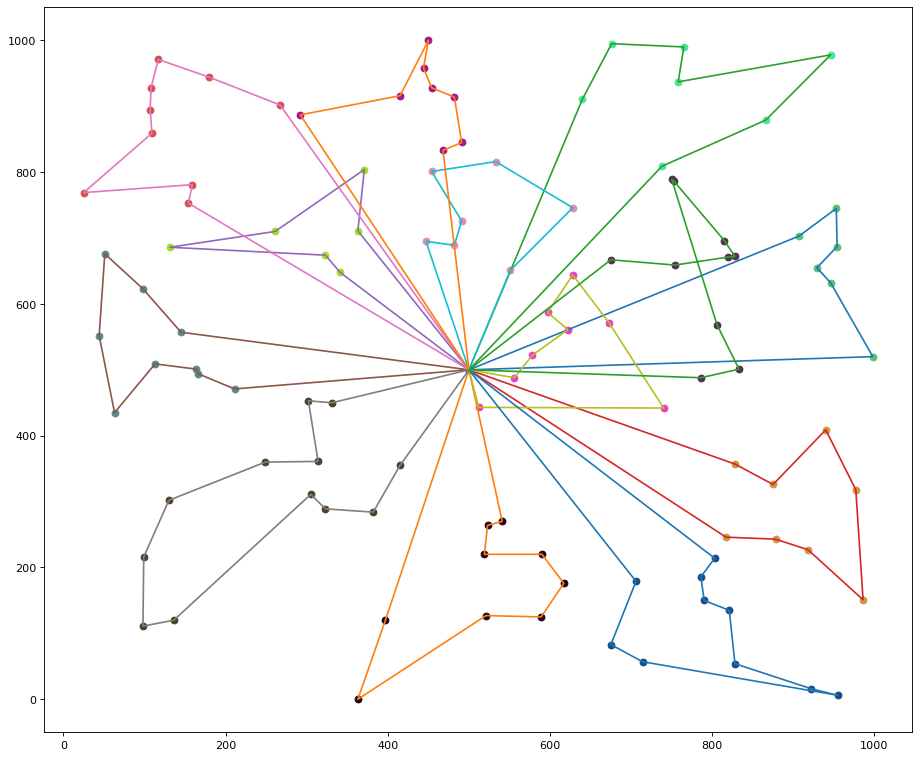

In [13]:
plot_points(fuzzy_cluster_center, fuzzy_distance_data, fuzzy_best_ant_paths, depot)


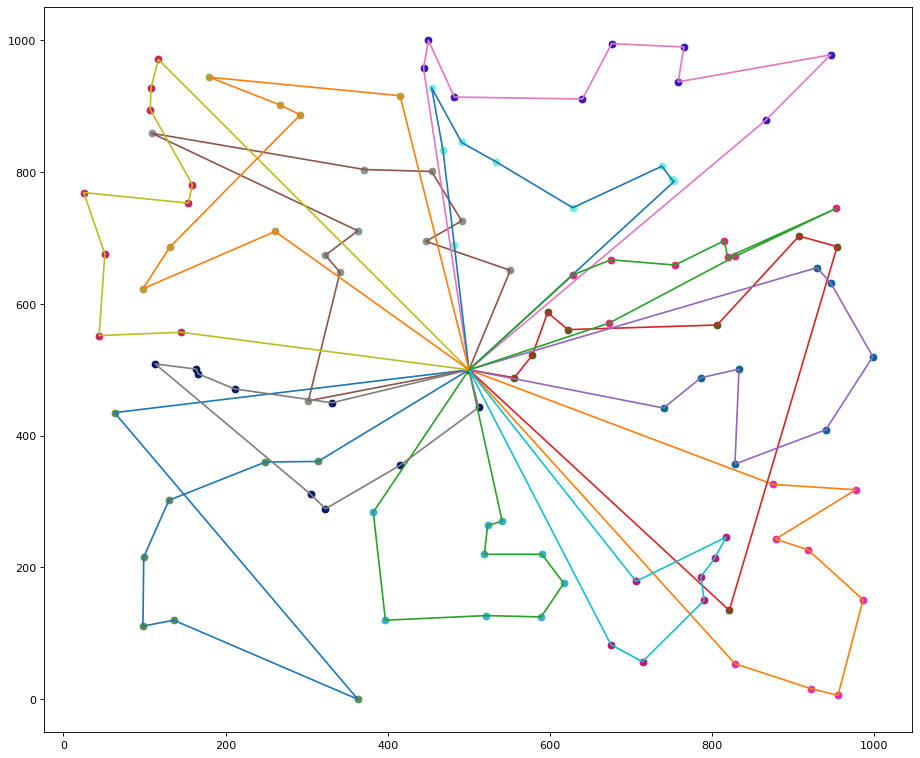

In [43]:
plot_points(kmean_cluster_center, kmean_distance_data, kmean_best_ant_paths, depot)